In [1]:
import sklearn.metrics as ms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bin_classes=    [0,0,0,1,1,1,1,1,1,1]
bin_predictions=[0,1,1,1,1,1,1,0,0,0]

In [3]:
multi_classes=    [0,0,0,1,1,1,2,2,2,2]
multi_predictions=[0,0,1,1,1,1,2,2,0,1]

In [4]:
def plot_confusion(task='both'):
    if (task=='bin'):
        ms.ConfusionMatrixDisplay.from_predictions(bin_classes, bin_predictions)
    if (task=='multi'):
        ms.ConfusionMatrixDisplay.from_predictions(multi_classes, multi_predictions)
    if (task=='both'):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
        ms.ConfusionMatrixDisplay.from_predictions(bin_classes, bin_predictions, ax=axes[0])
        ms.ConfusionMatrixDisplay.from_predictions(multi_classes, multi_predictions, ax=axes[1])

# Accuracy

$$acc=\frac{\text{#correctly classified instances}}{\text{#instances}}$$
* summarize quality in a single score
* intuitive formula
* ignorant towards imbalanced classes or differences in costs      of missclassification for different classes


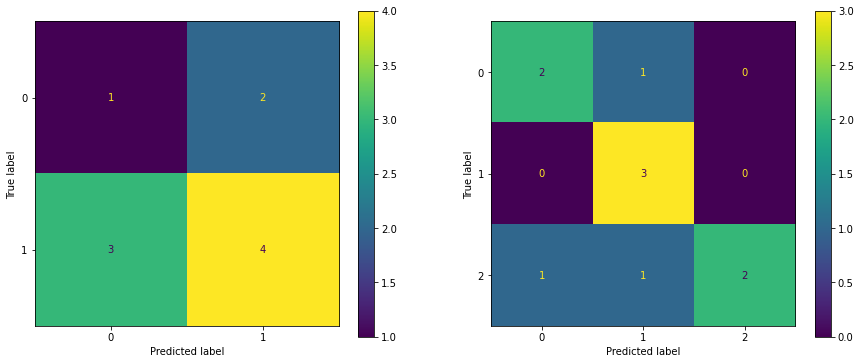

In [5]:
plot_confusion()

In [6]:
ms.accuracy_score(bin_classes, bin_predictions), \
ms.accuracy_score(multi_classes, multi_predictions)

(0.5, 0.7)

In [7]:
(1+4)/10, (2+3+2)/10

(0.5, 0.7)

# Balanced Accuracy

$$bacc=\frac{1}{k}\sum_{i=1}^k{\frac{\text{\#correctly classified instances of class } C_i}{|C_i|}}$$
* average accuracy over all classes
* each class has the same weight
* average of recall per class

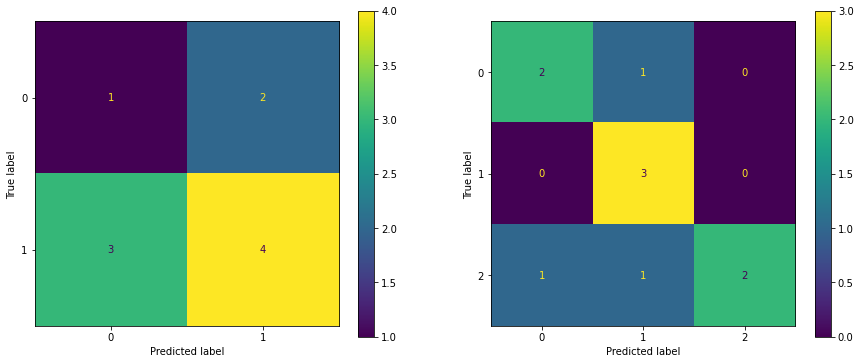

In [8]:
plot_confusion()

In [9]:
ms.balanced_accuracy_score(bin_classes, bin_predictions), \
ms.balanced_accuracy_score(multi_classes, multi_predictions)

(0.45238095238095233, 0.7222222222222222)

In [10]:
(1/(1+2) + 4/(3+4))/2

0.45238095238095233

# Precision and Recall ... and F1
* focus usually on the detection of one class (the positive class) among many elements of the other
* \eg spam: find the few good mails among the massive amounts of spam
* recommenders: find the few items a user is interested in within the vast set of available products

## Precision
$$precision(C_i)=\frac{\text{correctly classified instances of class }C_i}{\text{\#instances classified as } C_i}$$
* $0\le precision(C_i)\le 1$
* in binary classification: $\frac{tp}{(tp+fp)}$
* How many of the elements identified as class $C_i$ are actually $C_i$?

## Recall (Sensitivity)
$$recall(C_i)=\frac{\text{correctly classified instances of class }C_i}{\text{\#instances of class } C_i}$$
* $0\le recall(C_i)\le 1$
* in binary classification: $\frac{tp}{(tp+fn)}$
* How many of the elements of class $C_i$ have been recognizes as $C_i$?

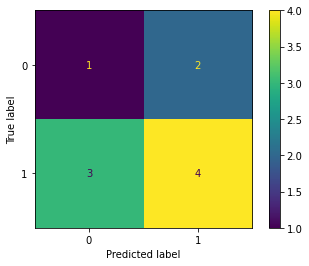

In [11]:
plot_confusion('bin')

In [12]:
precision=ms.precision_score(bin_classes, bin_predictions)
precision, 4/(2+4)

(0.6666666666666666, 0.6666666666666666)

In [14]:
recall=ms.recall_score(bin_classes, bin_predictions)
recall, 4/(3+4)

(0.5714285714285714, 0.5714285714285714)

### Problems
1. Precision alone is no useful metric.
2. Recall alone is no useful metric.

Why? Examples:
If we classify everything as class $1$, then the recall of class $1$ will be $1$, precision will be very low.
If we classify only one element of class $1$ correctly and everything as class $0$, then precision will be $1$, recall will be very low.

Only when both metrics are high, the classification is good. Therefore: f1-measure

## F1 measure
$$f1(C_i)=\frac{2}{\frac{1}{precision(C_i)} + \frac{1}{recall(C_i)}}$$
* $0\le f1(C_i)\le 1$
* f1 is high when both, recall and precision are high

In [15]:
ms.f1_score(bin_classes, bin_predictions), (2/(1/precision + 1/recall))

(0.6153846153846153, 0.6153846153846154)

# Multiclass Precision and Recall ... and F1
* the binary measures focus on one class against another
* there are several ways to transport this idea to multiclass problems

## Macro Averages
* compute precision/recall per class
* average precision/recalls scores over all classes

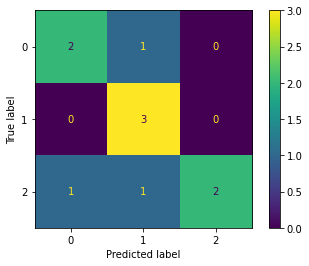

In [16]:
plot_confusion('multi')

In [18]:
precision=ms.precision_score(multi_classes, multi_predictions, average='macro')
precision, 1/3*(2/(2+0+1) + 3/(3+1+1) + 2/(2+0+0))

(0.7555555555555555, 0.7555555555555555)

In [19]:
recall=ms.recall_score(multi_classes, multi_predictions, average='macro')
recall, 1/3*(2/(2+1+0) + 3/(0+3+0) + 2/(1+1+2))

(0.7222222222222222, 0.7222222222222221)

In [20]:
ms.f1_score(multi_classes, multi_predictions, average='macro'), 1/3 * ( 2/(1/(2/(2+0+1))+1/(2/(2+1+0))) + 2/(1/(3/(3+1+1))+1/(3/(0+3+0))) + 2/(1/(2/(2+0+0))+1/(2/(1+1+2))) ) 

(0.6944444444444443, 0.6944444444444443)

## Micro Average
* create an overall "global" binary task by pooling one confusion matrix per class

In [21]:
multi_classes, multi_predictions

([0, 0, 0, 1, 1, 1, 2, 2, 2, 2], [0, 0, 1, 1, 1, 1, 2, 2, 0, 1])

In [22]:
multi_classes_0    =[1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
multi_predictions_0=[1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
multi_classes_1    =[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
multi_predictions_1=[0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
multi_classes_2    =[0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
multi_predictions_2=[0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
multi_classes_pooled=np.concatenate([multi_classes_0, multi_classes_1, multi_classes_2])
multi_predictions_pooled=np.concatenate([multi_predictions_0, multi_predictions_1, multi_predictions_2])

In [23]:
precision=ms.precision_score(multi_classes, multi_predictions, average='micro')
precision, ms.precision_score(multi_classes_pooled, multi_predictions_pooled)

(0.7, 0.7)

In [24]:
recall=ms.recall_score(multi_classes, multi_predictions, average='micro')
recall, ms.recall_score(multi_classes_pooled, multi_predictions_pooled)

(0.7, 0.7)

# ROC (Receiver Operator Characteristics)
* for binary predictions with probabilities
* reward classifiers that are sure with high probability
* contains the true positives rate (precision) and the false positives rate (false alarms) for different probability levels
* level $p$ means: Compute the classification metric after using $p$ as threshold and classifying everything as $1$ where the probability is higher or equal to $p$
* starts at (0,0), ends at (1,1)
* curve steps up for correctly classified members of the positive class, moves to the right for misclassified actual negatives 

In [4]:
bin_classes

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

In [10]:
# probabilities for the positive class (1)
bin_proba        =[0.1, 0.55, 0.6, 0.9, 0.7, 0.7, 0.6, 0.4, 0.4, 0.2]
bin_proba_random =[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
bin_proba_best   =[0.1, 0.1, 0.2, 0.9, 0.8, 0.7, 0.6, 0.9, 0.9, 0.7]
bin_proba_test   = [0.99, 0.1, 0.2, 0.9, 0.8, 0.7, 0.6, 0.9, 0.9, 0.7]

In [6]:
roc=ms.roc_curve(bin_classes, bin_proba)
roc

(array([0.        , 0.        , 0.        , 0.33333333, 0.66666667,
        0.66666667, 0.66666667, 1.        ]),
 array([0.        , 0.14285714, 0.42857143, 0.57142857, 0.57142857,
        0.85714286, 1.        , 1.        ]),
 array([1.9 , 0.9 , 0.7 , 0.6 , 0.55, 0.4 , 0.2 , 0.1 ]))

In [7]:
roc_random=ms.roc_curve(bin_classes, bin_proba_random)
roc_random

(array([0., 1.]), array([0., 1.]), array([1.5, 0.5]))

In [8]:
roc_best=ms.roc_curve(bin_classes, bin_proba_best)
roc_best

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 1.        ]),
 array([0.        , 0.42857143, 0.57142857, 0.85714286, 1.        ,
        1.        , 1.        ]),
 array([1.9, 0.9, 0.8, 0.7, 0.6, 0.2, 0.1]))

In [11]:
roc_test=ms.roc_curve(bin_classes, bin_proba_test)
roc_test

(array([0.        , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
        0.33333333, 1.        ]),
 array([0.        , 0.        , 0.42857143, 0.57142857, 0.85714286,
        1.        , 1.        ]),
 array([1.99, 0.99, 0.9 , 0.8 , 0.7 , 0.6 , 0.1 ]))

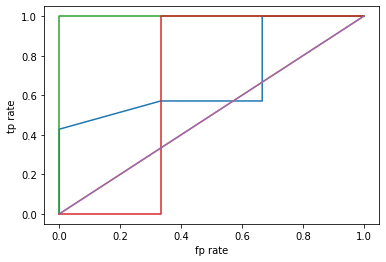

In [12]:
plt.plot(roc[0], roc[1])
plt.xlabel('fp rate') # fp/(tn+fp) (false alarm rate)
plt.ylabel('tp rate') # tp/(tp+fp) (precision)
plt.plot(roc_random[0], roc_random[1])
plt.plot(roc_best[0], roc_best[1])
plt.plot(roc_test[0], roc_test[1])
plt.plot([0,1], [0,1])

## Area under the ROC Curve
* Integral under the ROC Curve
* higher is better
* should be higher than 0.5 (= random guessing)
* 1 means each positive instance has a higher probability than each negative instance

In [13]:
ms.roc_auc_score(bin_classes, bin_proba_best)

1.0

In [14]:
ms.roc_auc_score(bin_classes, bin_proba)

0.6904761904761905

In [15]:
ms.roc_auc_score(bin_classes, bin_proba_random)

0.5